In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
import io
admission_df  = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv'])) 
print(admission_df )

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit
0             1        337          118  ...  9.65         1             0.92
1             2        324          107  ...  8.87         1             0.76
2             3        316          104  ...  8.00         1             0.72
3             4        322          110  ...  8.67         1             0.80
4             5        314          103  ...  8.21         0             0.65
..          ...        ...          ...  ...   ...       ...              ...
495         496        332          108  ...  9.02         1             0.87
496         497        337          117  ...  9.87         1             0.96
497         498        330          120  ...  9.56         1             0.93
498         499        312          103  ...  8.43         0             0.73
499         500        327          113  ...  9.04         0             0.84

[500 rows x 9 columns]


In [ ]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True) 
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Grouping by University ranking 
df_university = admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efda546a9e8>,
      dtype=object)

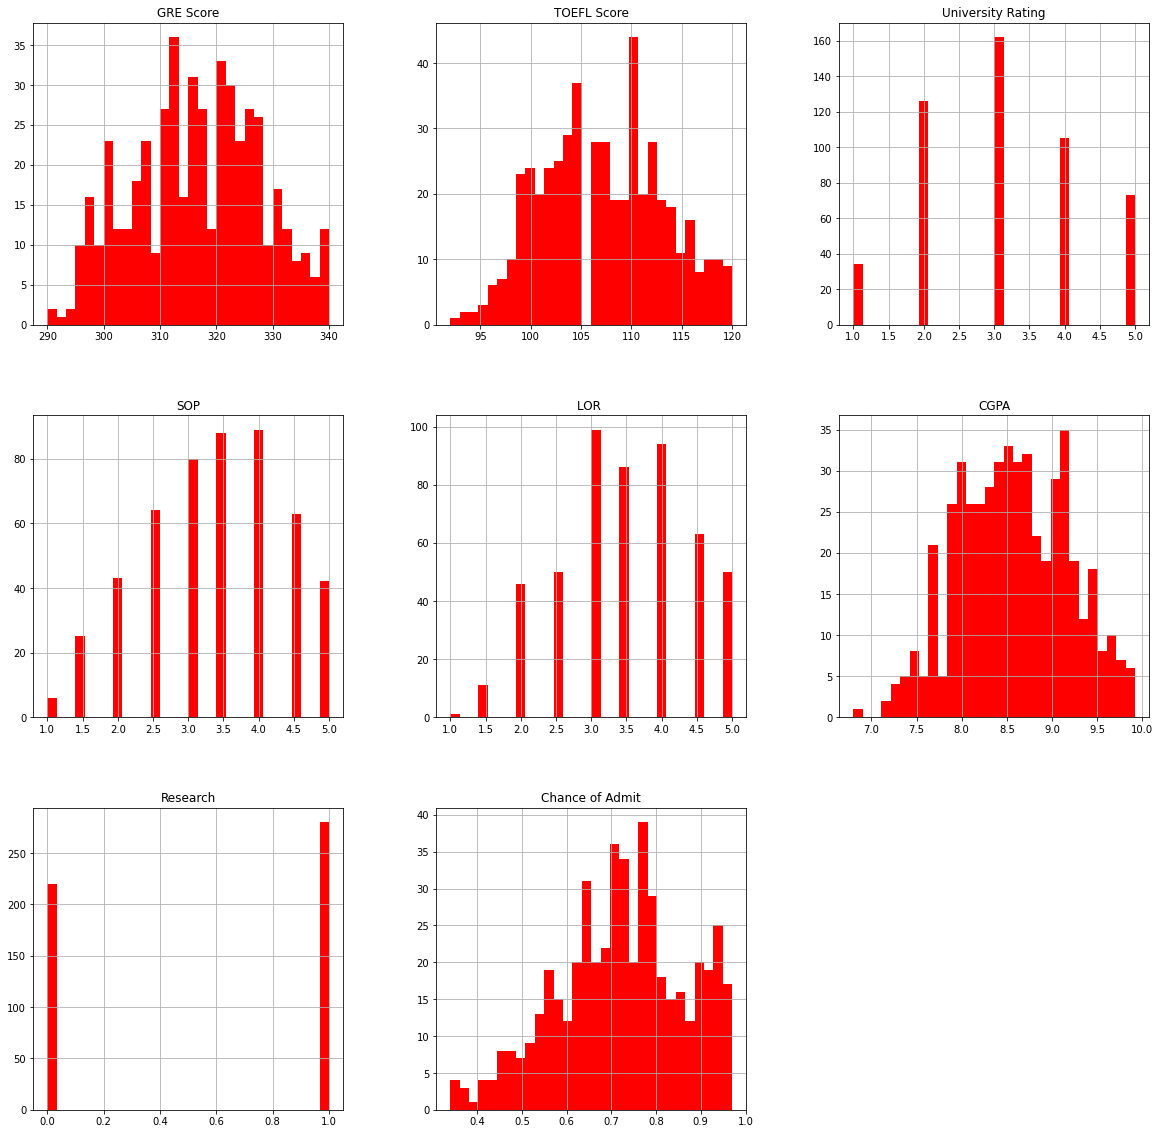

In [ ]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'r')


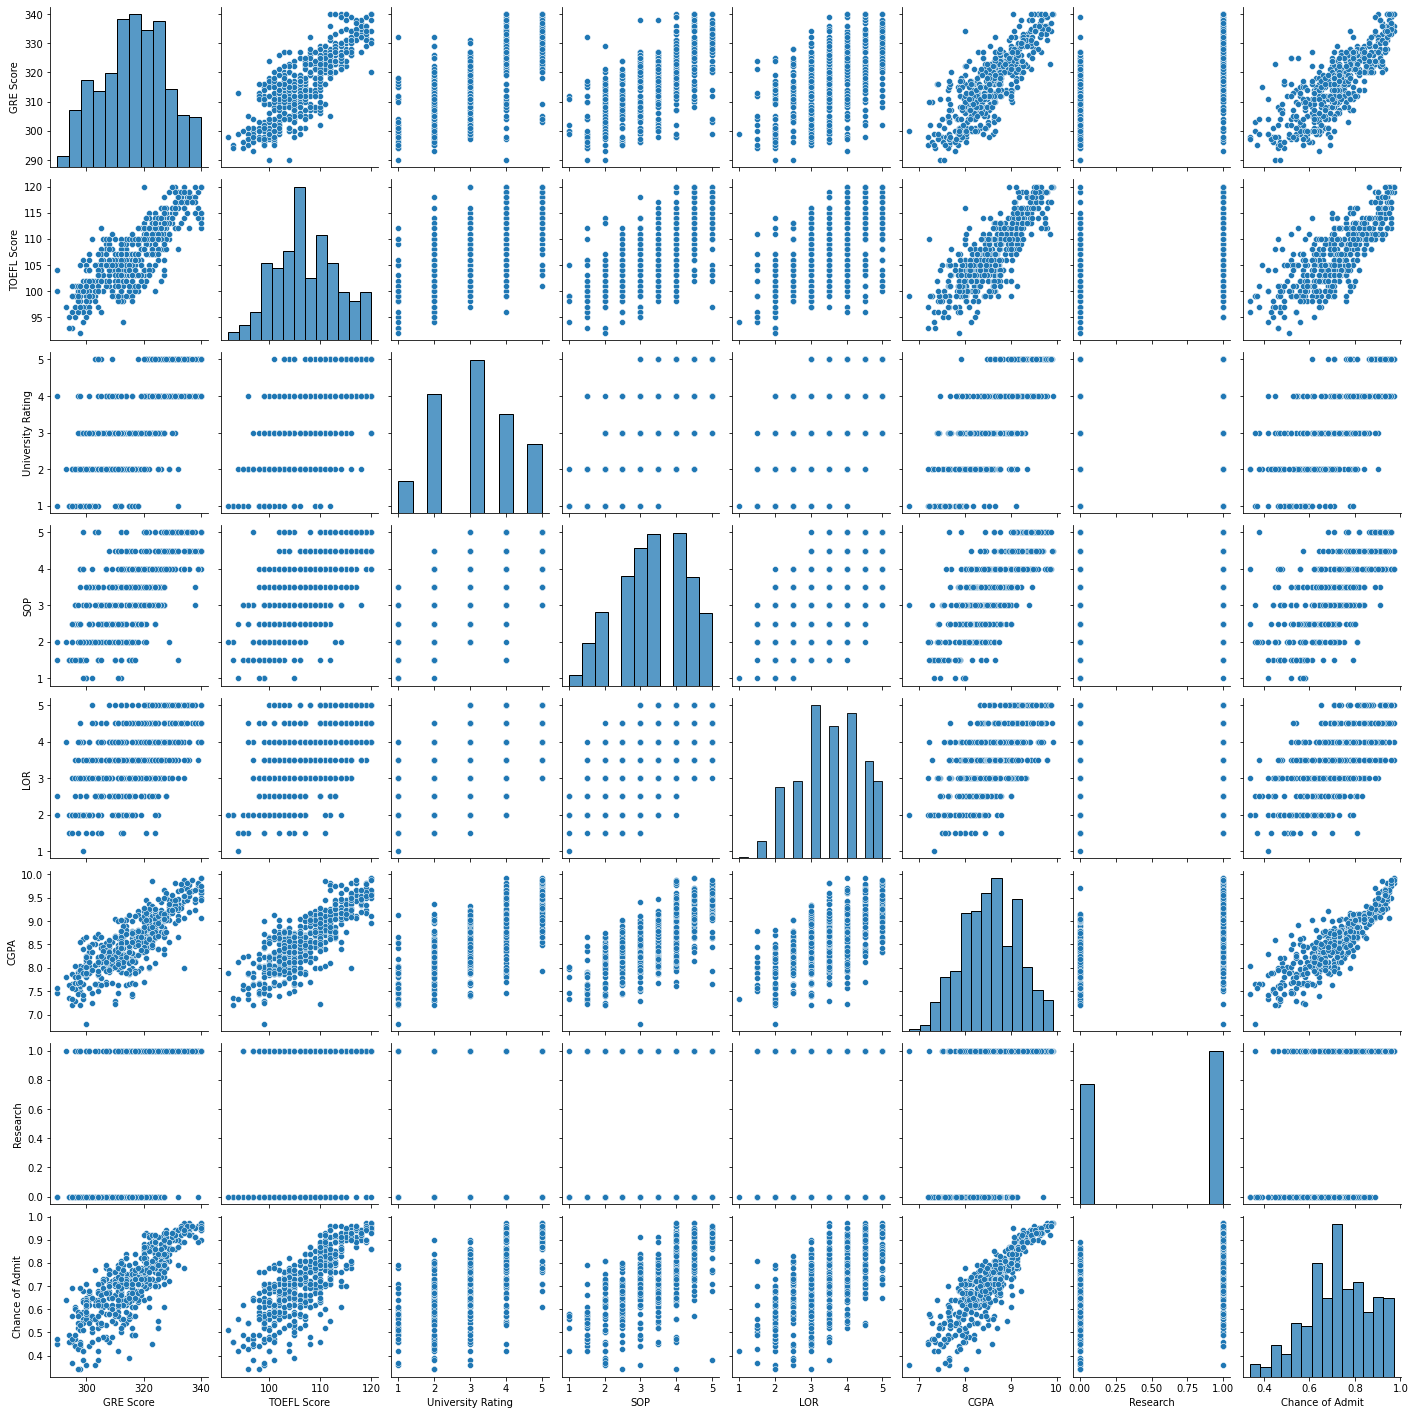

In [ ]:
sns.pairplot(admission_df)

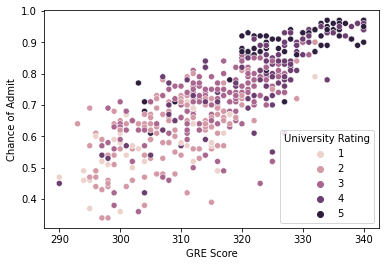

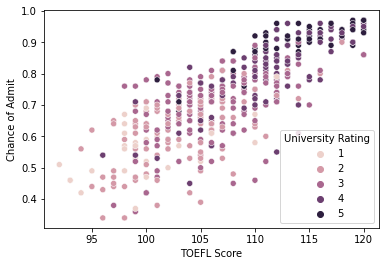

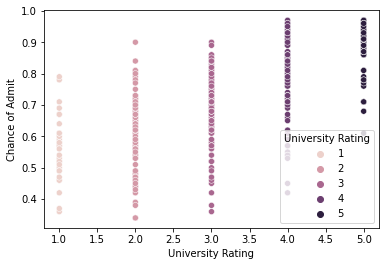

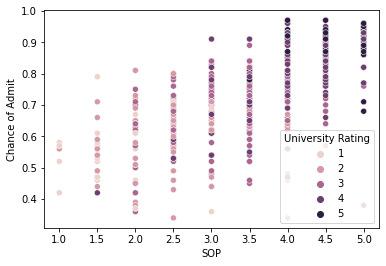

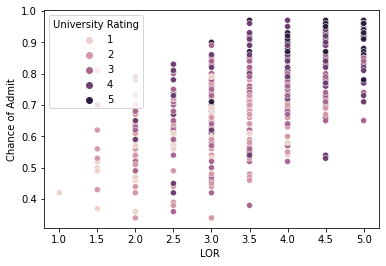

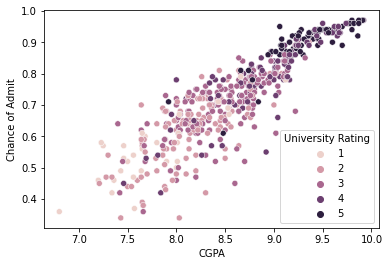

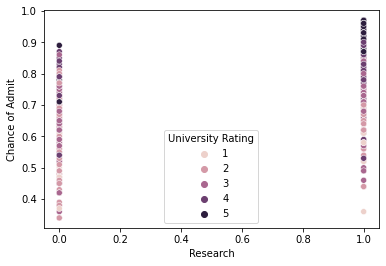

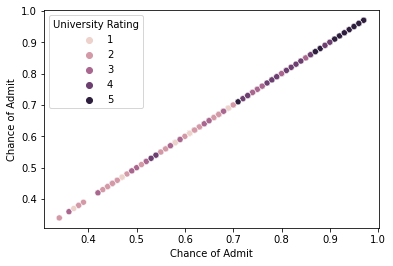

In [ ]:
for i in admission_df.columns:
  sns.scatterplot(x = i, y='Chance of Admit', hue = "University Rating", hue_norm=(1,5),data= admission_df)
  plt.show()
  

In [ ]:
corr_matrix = admission_df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


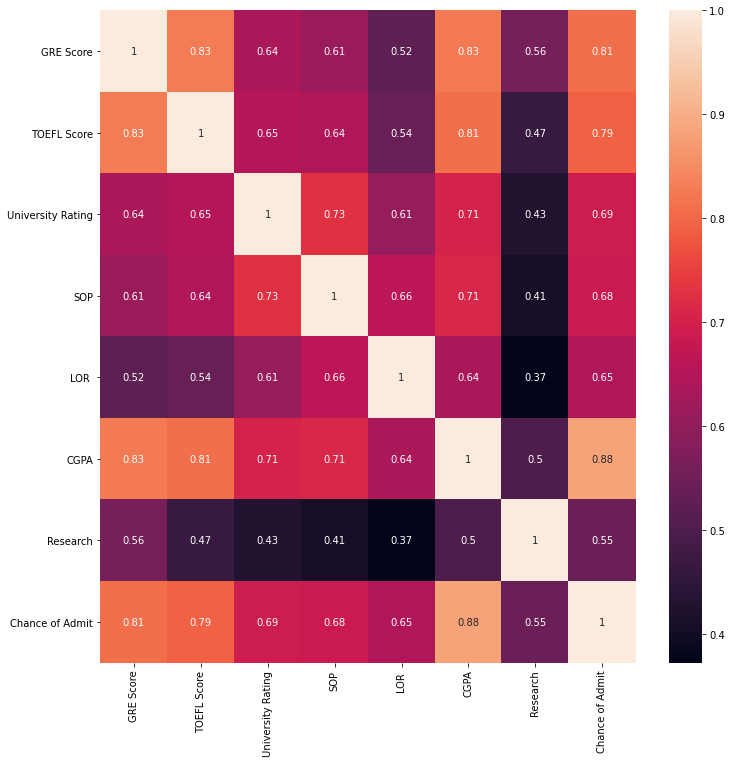

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()
# From the correlation matrix, it can be seen that, all parameters have positive correlation with chance of getting admission in to the university.

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
X = admission_df.drop(columns = ['Chance of Admit'])


In [ ]:
y = admission_df['Chance of Admit']

In [ ]:
X.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [ ]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [ ]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.7798186330859692

In [ ]:
!pip install --upgrade --ignore-installed tensorflow-gpu==1.3.1


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.3.1 (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.3.0, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.9.0, 1.10.0, 1.10.1, 1.11.0, 1.12.0, 1.12.2, 1.12.3, 1.13.1, 1.13.2, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1)
ERROR: No matching distribution found for tensorflow-gpu==1.3.1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)       

In [ ]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5429 - val_loss: 0.2628
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3710 - val_loss: 0.1947
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3223 - val_loss: 0.1612
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2822 - val_loss: 0.1636
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2947 - val_loss: 0.1540
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2557 - val_loss: 0.1504
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2487 - val_loss: 0.1703
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2539 - val_loss: 0.1688
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2623 - val_loss: 0.1522
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2400 - val_loss: 0.1620
Epoch 11

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.3651
Accuracy : 0.634934812784195


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

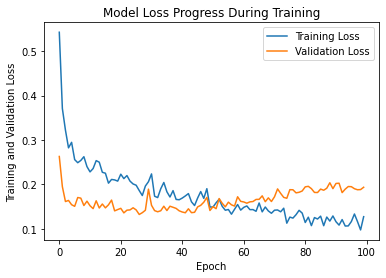

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6469424539499714

In [ ]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7099197218015023

Text(0, 0.5, 'True Values')

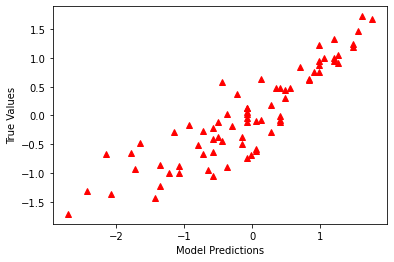

In [ ]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

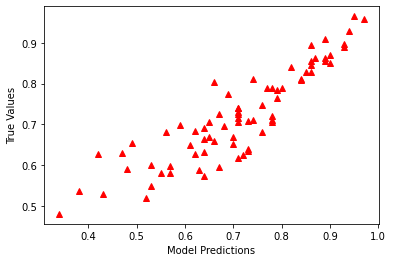

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.067 
MSE = 0.004451969380616407 
MAE = 0.049284994239088116 
R2 = 0.7798186330859692 
Adjusted R2 = 0.7568146096770406
